# BRK portfolio performance

This research look at the performance of the unerlying holdings of BRK's portfolio, not BRK itself – although they are close. The calculation is as if a portfilio allocate position according to BRK's holdings at the begigning date and adjust each quarter accordingly. Then the return is calcuated as the weighted time average return. (Just calculate return between each quarter and multiply them in the end.) 

The data souce is https://valuesider.com/guru/warren-buffett-berkshire-hathaway/portfolio/2013/4. It has portfolios for other "gurus".

## Result

BRK's actual holding is behind SPX slightly for the last decade. It's not terrible for a portfilio managed by a set of clearly defined diciplines and of such a huge size. And it's not rosy either. For small investors, investing BRK or copy Warren Buffet is as good as buying SPX.

In [66]:
import logging
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from random_ideas import twr
from valuesider_crawler.portfolio_crawler import PortfolioCrawler
from utils.logging_config import setup_logging

setup_logging(logging.ERROR)

%load_ext autoreload
%autoreload 2

2024-11-23 18:05:45 - pyplot.py:487 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-11-23 18:05:45 - pyplot.py:487 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
crawler = PortfolioCrawler('https://valuesider.com/guru/warren-buffett-berkshire-hathaway/portfolio/2013/2')
d = await crawler.crawl()

for k, v in d.items():
    v['period'] = k

df = pd.concat(d.values()).sort_values(by='period')
df.to_csv('brk-port-history.csv', index=False)

# To read back: dd = pd.read_csv('brk-port-history.csv')

In [ ]:
gain, returns = twr(df, end_date='2024-11-08')

In [44]:
gain

2.4162073358630085

In [50]:
for date, r in returns.items():
    print(date, f"{r*100:.2f}%")

2013-06-30 -0.05%
2013-09-30 10.13%
2013-12-31 1.24%
2014-03-31 4.03%
2014-06-30 -0.00%
2014-09-30 2.10%
2014-12-31 -2.46%
2015-03-31 0.35%
2015-06-30 -5.68%
2015-09-30 3.59%
2015-12-31 1.42%
2016-03-31 1.90%
2016-06-30 0.94%
2016-09-30 7.87%
2016-12-31 4.49%
2017-03-31 1.10%
2017-06-30 0.79%
2017-09-30 7.81%
2017-12-31 -5.88%
2018-03-31 3.76%
2018-06-30 6.62%
2018-09-30 -17.08%
2018-12-31 9.33%
2019-03-31 5.17%
2019-06-30 4.82%
2019-09-30 15.88%
2019-12-31 -26.34%
2020-03-31 22.93%
2020-06-30 14.29%
2020-09-30 16.56%
2020-12-31 2.80%
2021-03-31 9.57%
2021-06-30 1.15%
2021-09-30 13.47%
2021-12-31 -0.59%
2022-03-31 -17.55%
2022-06-30 -2.32%
2022-09-30 4.72%
2022-12-31 9.67%
2023-03-31 9.26%
2023-06-30 -7.94%
2023-09-30 12.03%
2023-12-31 0.08%
2024-03-31 9.70%
2024-06-30 7.56%
2024-09-30 1.57%


In [53]:
df.head()

,symbol,company,portfolio_weight,shares,buy_price,current_price,value,change,period
0,AXP,AMERICAN EXPRESS CO,0.1234,151610700.0,74.76,301.30,1.133442e+13,0.1234,2013-06-30
24,NOV,NATIONAL OILWELL VARCO INC,0.0067,8880000.0,68.90,16.61,6.118320e+11,0.0067,2013-06-30
25,PSX,PHILLIPS 66,0.0174,27163918.0,58.91,133.27,1.600226e+12,0.0174,2013-06-30
26,PCP,PRECISION CASTPARTS CORP,0.0049,1977336.0,226.01,NaN,4.468980e+11,0.0049,2013-06-30
27,PG,PROCTER & GAMBLE CO/THE,0.0443,52793078.0,76.99,176.28,4.064539e+12,0.0442,2013-06-30


In [ ]:
spx = df[['period']].drop_duplicates()
spx['symbol'] = '^SPX'
spx['portfolio_weight'] = 1.0
spx

In [56]:
spx_gain, spx_returns = twr(spx, end_date='2024-11-08')

Missing the following stock price:


2024-11-23 18:25:45 - category.py:223 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-23 18:25:45 - category.py:223 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-23 18:25:45 - category.py:223 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-23 18:25:45 - category.py:223 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


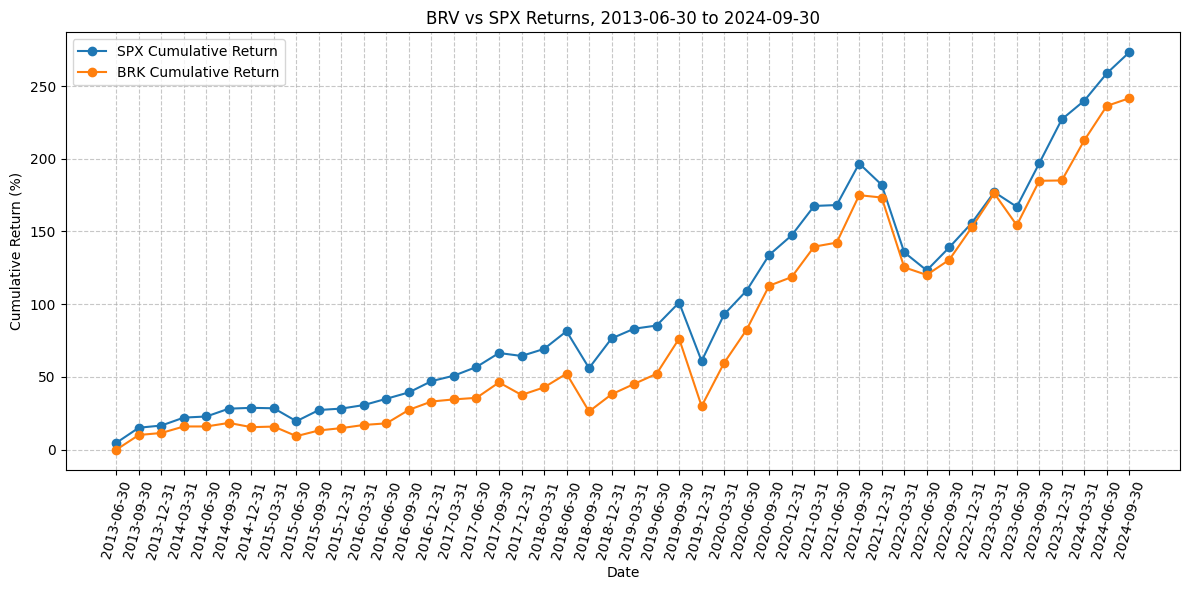

In [82]:
dates = sorted(returns.keys())
cmp = pd.DataFrame.from_dict(
    {
        'date': dates,
        'brk': [returns[d] for d in dates],  
        'spx':[spx_returns[d] for d in dates],
    })

cmp['accum_spx'] = (1 + cmp['spx']).cumprod() - 1
cmp['accum_brk'] = (1 + cmp['brk']).cumprod() - 1    

plt.figure(figsize=(12, 6))
plt.plot(cmp.date, cmp['accum_spx'] * 100, label='SPX Cumulative Return', marker='o')
plt.plot(cmp.date, cmp['accum_brk'] * 100, label='BRK Cumulative Return', marker='o')

plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f'BRV vs SPX Returns, {df.period.min()} to {df.period.max()}')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.xticks(rotation=75)
plt.legend()
plt.tight_layout()
